# Feature Scaling

![Flujo de Trabajo en Data Science](DataScienceWithPython-main/jupyter/final/img/ds-workflow.png)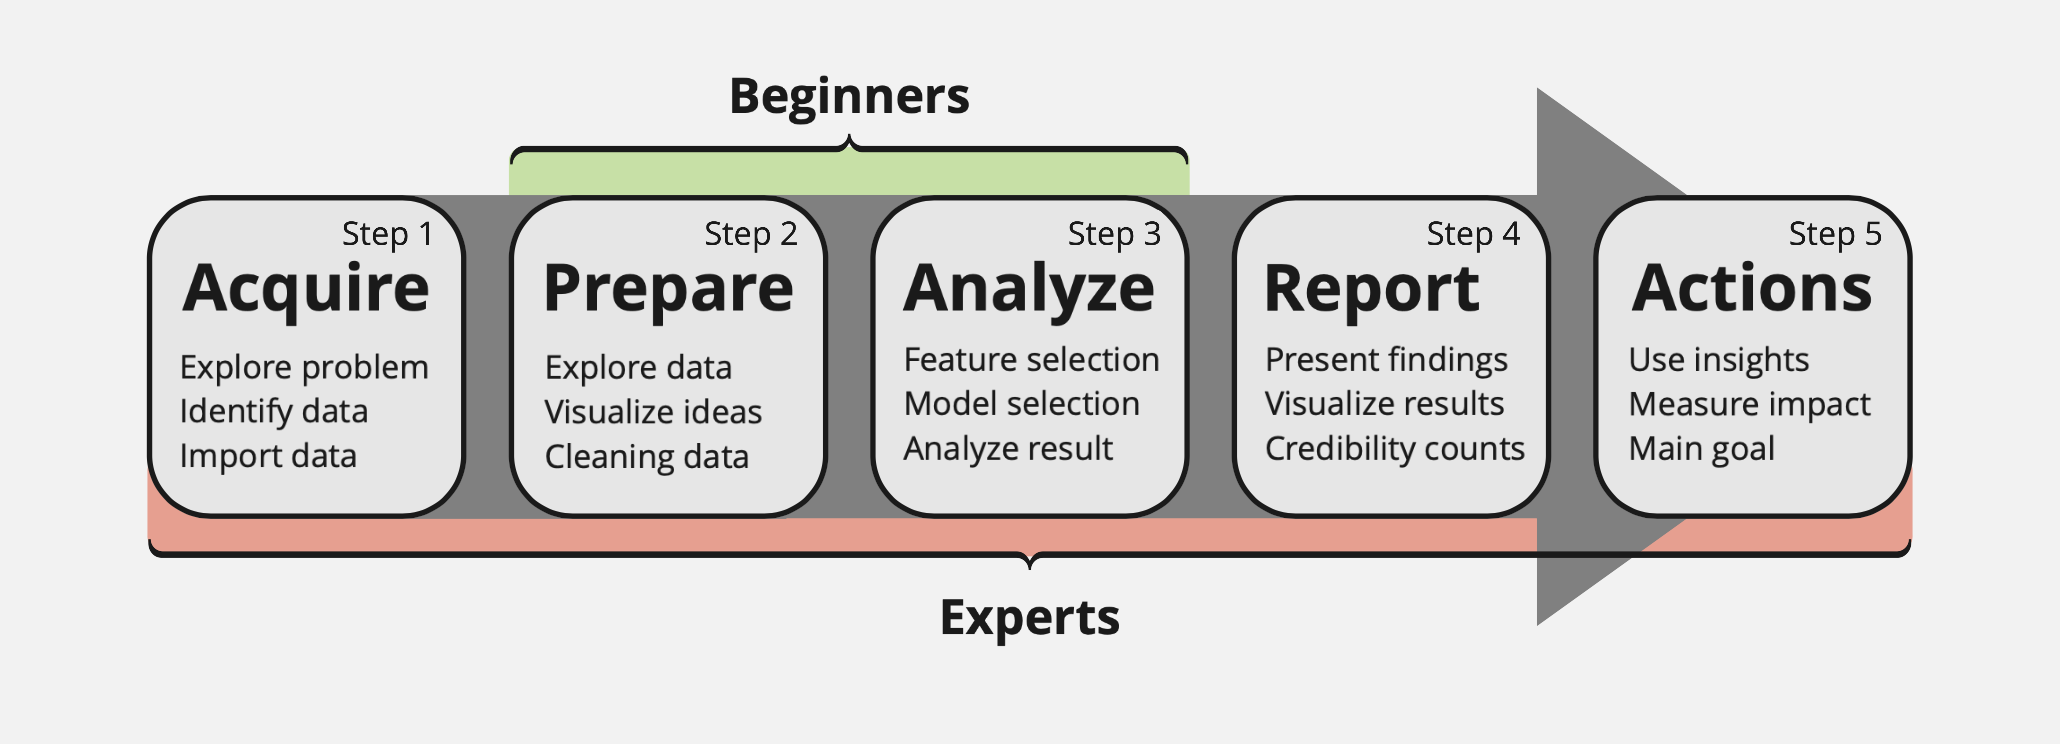

## Que es escalamiento (*Feature Scaling*)?
- **Feature Scaling** transforma valores a un rango similar con la finalidad de que algoritmos de machine learning tengan un comportamiento "óptimo".
- **Feature Scaling** es una solución a problemas de **Machine Learning** en las que multiples características contienen diferentes magnitudes.
- **Feature Scaling** puede ayudar también a comparar resultados.

## Tecnicas de escalado de características
* Min-Max scaling
* Normalization - Standardization (Z-score scaling)
* Robust scaling

In [26]:
import pandas as pd

# Sample DataFrame
data = {
    'A': [1, 2, 3, 4, 100],
    'B': [5, 6, 7, 8, 200]
}
df = pd.DataFrame(data)

## Min-Max scaling

Transforma valores al escalarlos a un rango dado. El rango por defecto es [0,1].

- **La normalización** es un caso especial de **MinMaxScaler**

$$
\frac{x_i-x_{min}}{x_{max}-x_{min}}
$$

- **Normalization**: Convierte valores $ X=[x_1,\dots,x_n]$ entre $x_i\in[0,1] $
```Python
(values - values.min())/(values.max() - values.min())
```
- **MinMaxScaler**: Entre cualquier valor

In [16]:
# Implementacion con SKLearn
from sklearn.preprocessing import MinMaxScaler

# 1er paso: crear mi escalador y proporcionarle el DF para que "aprenda"
mm_sc = MinMaxScaler().fit(df)
# 2do paso: transformar los datos
mm = mm_sc.transform(df)

# 3er paso: pasar los datos a un DF
df_mm = pd.DataFrame(mm, columns=df.columns)
df_mm.describe()#.round(3)

,A,B
count,5.000000,5.000000
mean,0.212121,0.206154
std,0.440582,0.443811
min,0.000000,0.000000
25%,0.010101,0.005128
50%,0.020202,0.010256
75%,0.030303,0.015385
max,1.000000,1.000000


<Axes: >

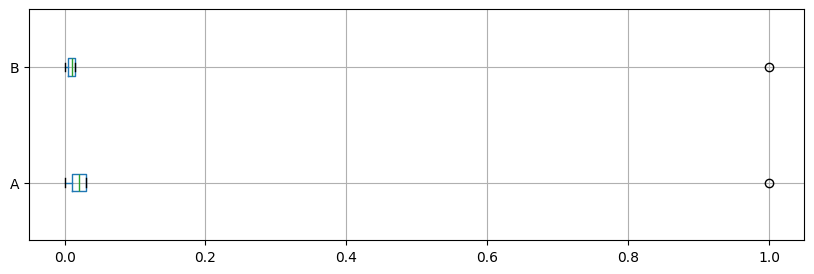

In [23]:
# Datos transformados con MinMax
df_mm.boxplot(vert=False, figsize=(10, 3))

### Hallazgos
* Minimos y maximos son 0 y 1 respectivamente

## **Standardization**
* **StandardScaler** en sklearn
$$
\frac{x_{i}-\tilde{x}}{x_{\sigma}}
$$
```Python
(values - values.mean())/values.std()
```
* Mean: 0, StdDev: 1
* Menos sensitivo a valores atípicos (outliers)

In [14]:
# Implementacion con SKLearn
from sklearn.preprocessing import StandardScaler

# 1er paso: crear mi escalador y proporcionarle el DF para que "aprenda"
ss = StandardScaler().fit(df)
# 2do paso: transformar los datos
rs = ss.transform(df)

# 3er paso: pasar los datos a un DF
df_ss = pd.DataFrame(rs, columns=df.columns)
df_ss.describe().round(3)

,A,B
count,5.000,5.000
mean,-0.000,0.000
std,1.118,1.118
min,-0.538,-0.519
25%,-0.513,-0.506
50%,-0.487,-0.493
75%,-0.461,-0.481
max,1.999,2.000


### Hallazgos Standard Scaler
* Media: aproxima a 0
* Standard Deviation: se aproxima

<Axes: >

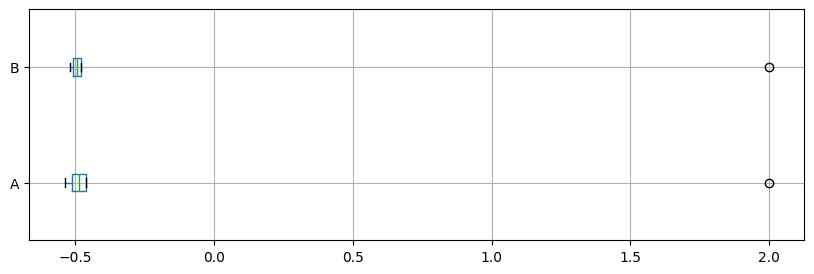

In [24]:
df_ss.boxplot(vert=False, figsize=(10, 3))

## Robust scaling
Remueve la mediana y escala los datos de acuerdo a un Rango Quantil (comunmente el IQR).

`X_scaled = (X - X.median) / IQR`
* Robusto a valores atípicos
* Los datos se centran con respecto a la mediana
* IQR: el rango entre el 1er quartile (25th quantile) y el 3er quartile (75th quantile)
* [Implementación de SciKitLearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)

```Python
from sklearn.preprocessing import RobustScaler
# ejemplo
df['robust_variable'] = RobustScaler().fit_transform(df['raw_variable']) #Fit to data, then transform it.
inverse_transform(df['robust_variable']) # Scale back the data to the original representation.
```

In [5]:
def robust_scale(df):
    # Calculate the median and IQR for each column
    median = df.median() # aggregation function
    iqr = df.quantile(0.75) - df.quantile(0.25) # Q3 - Q1

    # Apply robust scaling
    scaled_df = (df - median) / iqr
    return scaled_df

# Applying robust scaling
scaled_df = robust_scale(df)

print("Original DataFrame:\n", df, '\n\nMediana\n', df.median(),'\n\nMedia\n', df.mean())
print("\nScaled DataFrame:\n", scaled_df,'\n\n',scaled_df.median())

Original DataFrame:
      A    B
0    1    5
1    2    6
2    3    7
3    4    8
4  100  200 

Mediana
 A    3.0
B    7.0
dtype: float64 

Media
 A    22.0
B    45.2
dtype: float64

Scaled DataFrame:
       A     B
0  -1.0  -1.0
1  -0.5  -0.5
2   0.0   0.0
3   0.5   0.5
4  48.5  96.5 

 A    0.0
B    0.0
dtype: float64


In [11]:
# Implementacion con SKLearn
from sklearn.preprocessing import RobustScaler

# 1er paso: crear mi escalador y proporcionarle el DF para que "aprenda"
rs = RobustScaler().fit(df)
# 2do paso: transformar los datos
rs = rs.transform(df)

# 3er paso: pasar los datos a un DF
df_rs = pd.DataFrame(rs, columns=df.columns)
df_rs.describe()

,A,B
count,5.000000,5.000000
mean,9.500000,19.100000
std,21.808828,43.271526
min,-1.000000,-1.000000
25%,-0.500000,-0.500000
50%,0.000000,0.000000
75%,0.500000,0.500000
max,48.500000,96.500000


<Axes: >

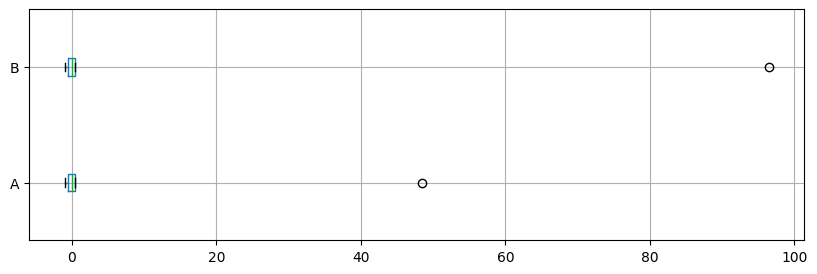

In [25]:
df_rs.boxplot(vert=False, figsize=(10, 3))

### Hallazgos:
* Mediana: se "hizo" 0
* IQR: se "hizo" 1

# Utilidad en Algoritmos de aprendizaje automático
- Algunos algoritmos son más sensitivos que otros
- **Basados en distancia** los algoritmos se ven más afectados por el rango de sus características.
    - Ejemplos: [KNN](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), [K-means](https://en.wikipedia.org/wiki/K-means_clustering), [SVM](https://en.wikipedia.org/wiki/Support-vector_machine)

### Distancia Euclidiana
Una métrica comunmente utilizada en ML para medir "similitud" entre instancias.

$d(p, q)=\sqrt{\sum_{i=1}^{n}(q_i-p_i)^{2}}$

In [ ]:
import math

def euclideandist(q, p):
    dist=0
    for qi, pi in zip(q,p):
        dist+=(qi - pi)**2
    return math.sqrt(dist)

# alturas (mts), peso (kgs)
p = [1.6, 78]
m = [2.1, 96]
print('Similitud entre Pedro y Maria', euclideandist(p, m))

j = [1.6, 55]
e = [1.6, 85]
print('Similitud entre Juan y Esmeralda',euclideandist(j, e))
# ¿Qué variable (altura o peso) crees que tiene un mayor rol en el cálculo de la dist. Eucl?

Similitud entre Pedro y Maria 18.006943105369107
Similitud entre Juan y Esmeralda 30.0


## Ejemplo
- Datos meteorológicos `files/weather.csv`
- PROBLEMA: Predecir si lloverá mañana
- El objetivo es aprender sobre Normalización y Estandarización.

In [ ]:
import pandas as pd
!head weather.csv

Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
2008-02-01,19.5,22.4,15.6,6.2,0.0,,,S,SSW,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,,,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,,,ESE,ESE,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,,,NNE,E,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,,0.0,,,NNE,W,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes
2008-02-06,20.2,27.2,1.6,2.6,8.6,,,W,ENE,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,6.2,Yes
2008-02-07,18.6,26.3,6.2,5.2,5.2,,,W,S,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,27.6,Yes
2008-02-08,17.2,22.3,27.6,5.8,2.

In [ ]:
data = pd.read_csv('weather.csv', index_col=0, parse_dates=True)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [ ]:
data.RainTomorrow.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3337 entries, 2008-02-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3334 non-null   float64
 1   MaxTemp        3335 non-null   float64
 2   Rainfall       3331 non-null   float64
 3   Evaporation    3286 non-null   float64
 4   Sunshine       3321 non-null   float64
 5   WindGustDir    2301 non-null   object 
 6   WindGustSpeed  2301 non-null   float64
 7   WindDir9am     3281 non-null   object 
 8   WindDir3pm     3304 non-null   object 
 9   WindSpeed9am   3311 non-null   float64
 10  WindSpeed3pm   3312 non-null   float64
 11  Humidity9am    3323 non-null   float64
 12  Humidity3pm    3324 non-null   float64
 13  Pressure9am    3317 non-null   float64
 14  Pressure3pm    3318 non-null   float64
 15  Cloud9am       2771 non-null   float64
 16  Cloud3pm       2776 non-null   float64
 17  Temp9am        3333 non-null   flo

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3334.0,14.865057,4.553641,4.3,11.0,14.9,18.7,27.6
MaxTemp,3335.0,23.002339,4.494638,11.7,19.6,22.8,26.0,45.8
Rainfall,3331.0,3.330231,9.895172,0.0,0.0,0.0,1.4,119.4
Evaporation,3286.0,5.187432,2.777407,0.0,3.2,4.8,7.0,18.4
Sunshine,3321.0,7.179374,3.810886,0.0,4.3,8.3,10.2,13.6
WindGustSpeed,2301.0,41.761408,13.007523,17.0,31.0,41.0,50.0,96.0
WindSpeed9am,3311.0,15.070674,7.079724,0.0,9.0,15.0,20.0,54.0
WindSpeed3pm,3312.0,19.335447,7.482554,0.0,15.0,19.0,24.0,57.0
Humidity9am,3323.0,68.229010,15.085355,19.0,58.0,69.0,80.0,100.0
Humidity3pm,3324.0,54.699158,16.293530,10.0,44.0,56.0,65.0,99.0


### Preparación de datos para modelo de aprendizaje
- Solo nos centraremos en las columnas numéricas. ([`select_dtypes(include='number')`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html)
- Eliminaremos todos los valores faltantes [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)
- Nuestro objetivo es explorar *Feature scaling*:
* **Normalización**
* **Estandarización**
* **Robust scaling**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
data_clean = data.drop(['RISK_MM'], axis=1)
data_clean = data_clean.dropna()

In [ ]:
data_clean.shape

(1690, 21)

Separemos solo aquellos que son numericos y transformamos el *target* a numerico (0s y 1s).

In [ ]:
X = data_clean.select_dtypes(include='number') # seleccionar variables numericas
y = data_clean['RainTomorrow'] # target
y = np.array([0 if value == 'No' else 1 for value in y])
print('0: ',np.count_nonzero(y == 0), '\n1: ',np.count_nonzero(y == 1))

0:  1274 
1:  416


In [ ]:
X.shape

(1690, 16)

Comunmente, necesitamos separar nuestros datos en 2 o 3 conjuntos para evaluar.
Aqui, reservamos 20% para evaluar el modelo (veremos esto a profundidad en el 2do bloque).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

pd.DataFrame(X_train).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,14.980399,23.429734,2.851775,5.414571,7.511612,41.677515,14.980030,19.761095,66.477071,52.886095,1018.535873,1016.135281,4.151627,4.093195,18.089053,21.879216
std,4.553343,4.453831,8.176845,2.839351,3.696782,12.521289,6.600499,7.246114,15.161828,15.902517,7.054959,7.048462,2.721996,2.589659,4.951512,4.219905
min,5.000000,11.700000,0.000000,0.000000,0.000000,19.000000,2.000000,2.000000,19.000000,10.000000,996.700000,994.000000,0.000000,0.000000,6.700000,11.000000
25%,11.200000,20.200000,0.000000,3.400000,5.100000,31.000000,11.000000,15.000000,57.000000,43.000000,1013.975000,1011.500000,1.000000,1.000000,14.200000,18.800000
50%,15.000000,23.200000,0.000000,5.000000,8.500000,41.000000,15.000000,20.000000,67.000000,54.000000,1018.600000,1016.300000,4.000000,4.000000,18.400000,21.600000
75%,18.900000,26.400000,1.000000,7.400000,10.300000,50.000000,19.000000,24.000000,78.000000,63.000000,1023.400000,1021.000000,7.000000,7.000000,21.900000,24.800000
max,27.100000,45.800000,94.400000,15.800000,13.600000,91.000000,44.000000,48.000000,100.000000,95.000000,1039.000000,1036.000000,8.000000,8.000000,36.500000,44.700000


Visualizamos un par de valores numericos mediante *scatterplot*.

<Axes: xlabel='Rainfall', ylabel='Pressure3pm'>

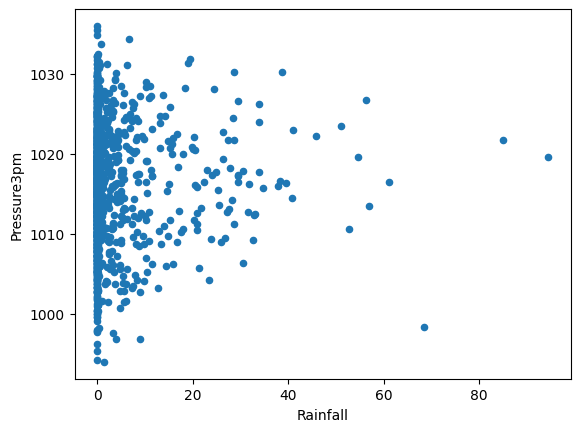

In [ ]:
X_train.plot.scatter(x='Rainfall', y='Pressure3pm')

### Box plots
- A great way to understand features
- Recap from Lesson 7
    - Box plots is a great way to visualize descriptive statistics
    - Notice that Q1: 25%, Q2: 50%, Q3: 75%

![Box plots](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1200px-Boxplot_vs_PDF.svg.png)

<Axes: >

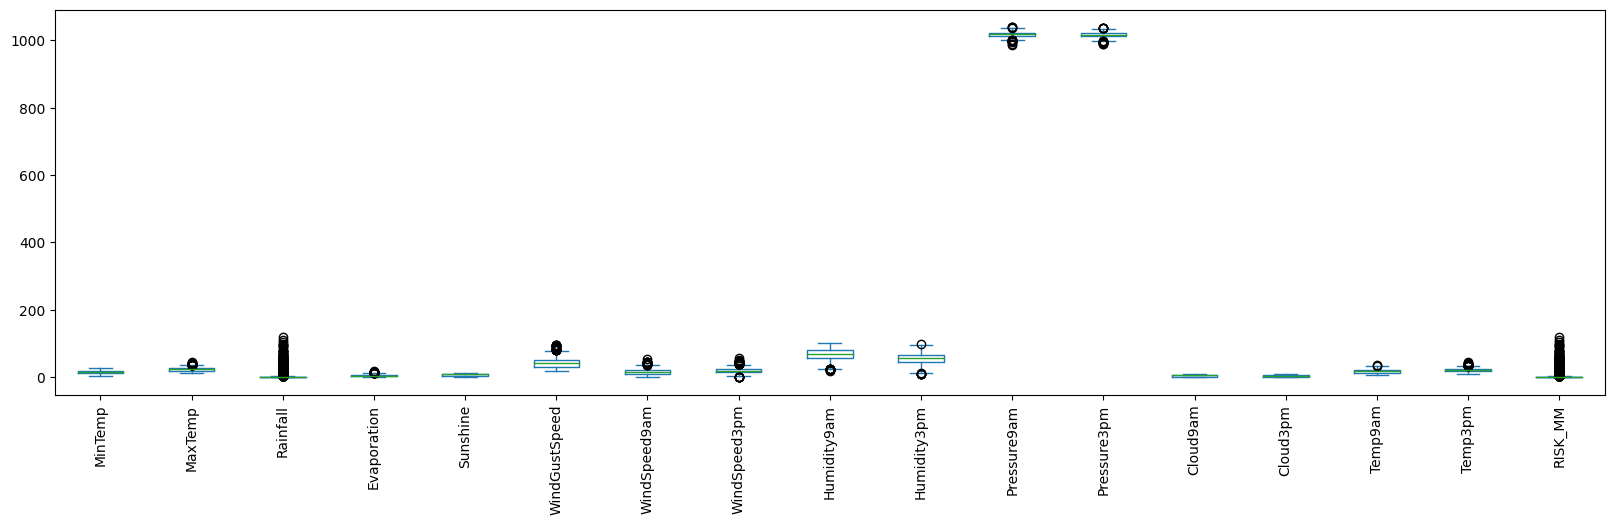

In [ ]:
#X_train.plot.box(figsize=(20,5), rot=90)
data.plot.box(figsize=(20,5), rot=90)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

### Normalization
- [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) Transform features by scaling each feature to a given range.
- `MinMaxScaler().fit(X_train)` is used to create a scaler.
    - Notice: We only do it on training data

In [ ]:
# Normalizacion MinMax
from sklearn.preprocessing import MinMaxScaler # importamos minmax

X = data.select_dtypes(include='number') # seleccionar variables numericas

norm = MinMaxScaler().fit(X) # ajusta parametros de la instancia de MinMaxScaler
array_norm = norm.transform(X) # Numpy array con escalamiento segun MinMax

data_norm = pd.DataFrame(array_norm, columns = X.columns) # creo DF con datos escalados
data_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3334.0,0.453436,0.195435,0.0,0.287554,0.454936,0.618026,1.0
MaxTemp,3335.0,0.331447,0.131808,0.0,0.231672,0.325513,0.419355,1.0
Rainfall,3331.0,0.027891,0.082874,0.0,0.000000,0.000000,0.011725,1.0
Evaporation,3286.0,0.281926,0.150946,0.0,0.173913,0.260870,0.380435,1.0
Sunshine,3321.0,0.527895,0.280212,0.0,0.316176,0.610294,0.750000,1.0
WindGustSpeed,2301.0,0.313436,0.164652,0.0,0.177215,0.303797,0.417722,1.0
WindSpeed9am,3311.0,0.279087,0.131106,0.0,0.166667,0.277778,0.370370,1.0
WindSpeed3pm,3312.0,0.339218,0.131273,0.0,0.263158,0.333333,0.421053,1.0
Humidity9am,3323.0,0.607766,0.186239,0.0,0.481481,0.617284,0.753086,1.0
Humidity3pm,3324.0,0.502238,0.183073,0.0,0.382022,0.516854,0.617978,1.0


<Axes: >

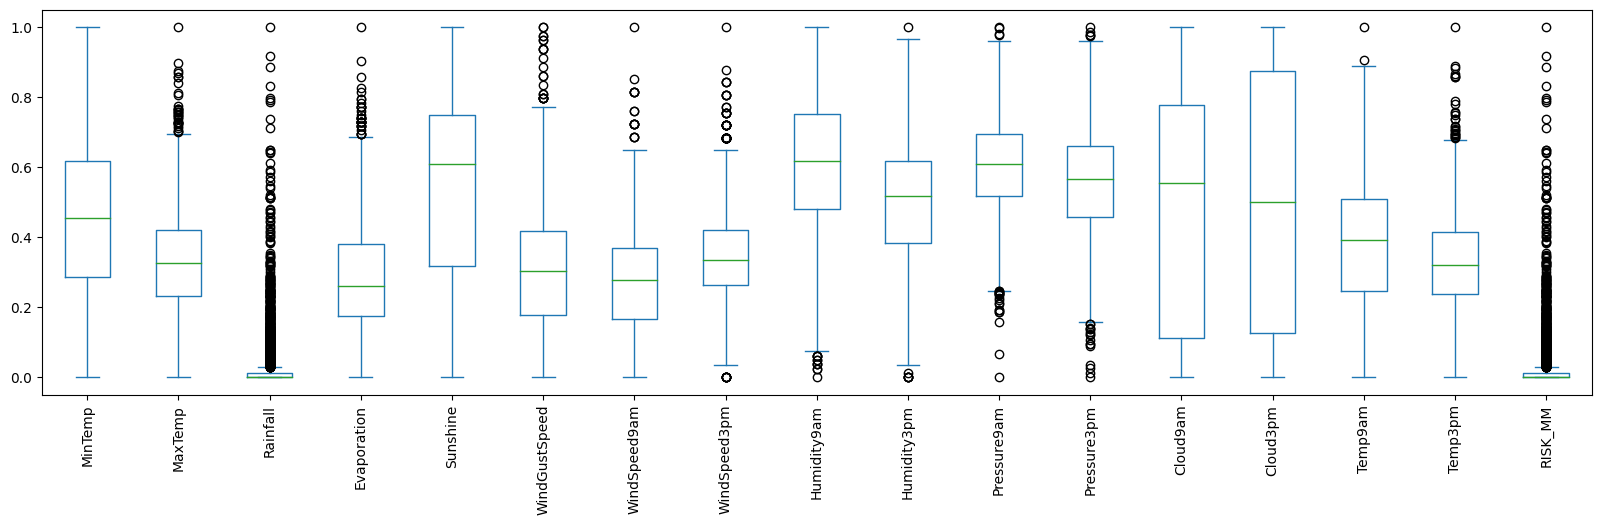

In [ ]:
#type(data_norm) # despues de escalar
data_norm.plot.box(figsize=(20,5), rot=90)
# Min Max

<Axes: >

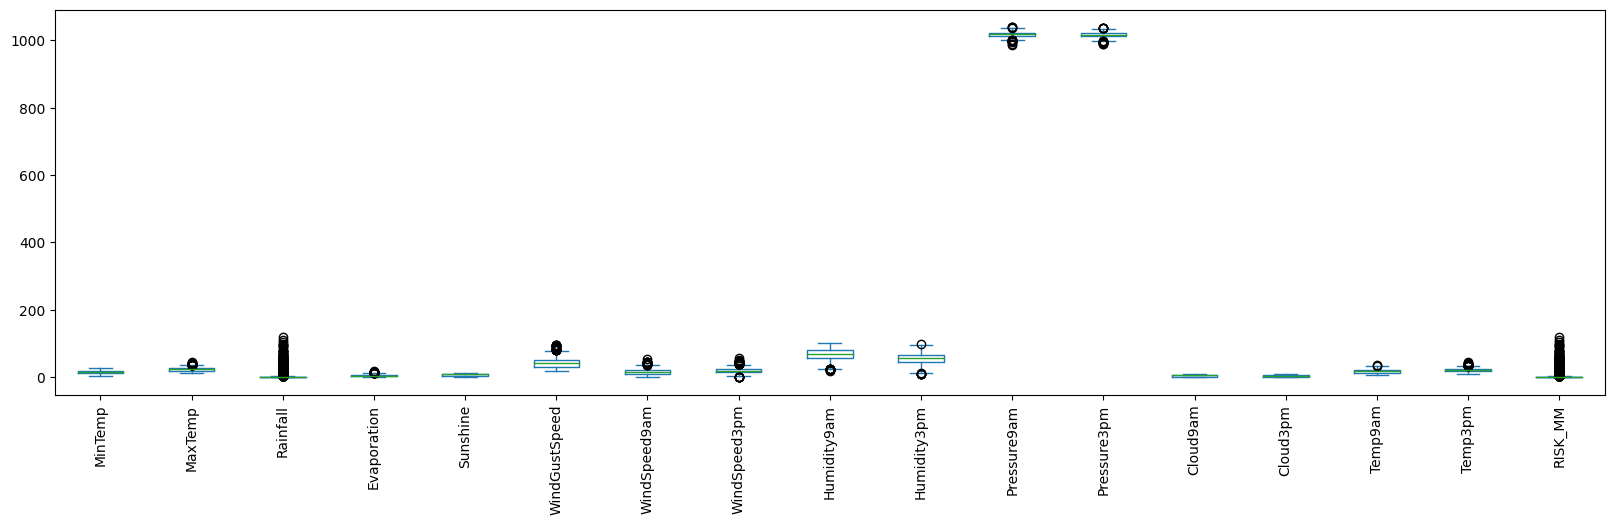

In [ ]:
# datos originales
data.plot.box(figsize=(20,5), rot=90)

In [ ]:
norm = MinMaxScaler().fit(X_train) # ajusta parametros de la instancia de MinMaxScaler

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
pd.DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,0.451602,0.343980,0.030209,0.342694,0.552324,0.314965,0.309048,0.386111,0.586137,0.504542,0.516214,0.527031,0.518953,0.511649,0.382183,0.322825
std,0.206034,0.130611,0.086619,0.179706,0.271822,0.173907,0.157155,0.157524,0.187183,0.187088,0.166784,0.167821,0.340250,0.323707,0.166158,0.125220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280543,0.249267,0.000000,0.215190,0.375000,0.166667,0.214286,0.282609,0.469136,0.388235,0.408392,0.416667,0.125000,0.125000,0.251678,0.231454
50%,0.452489,0.337243,0.000000,0.316456,0.625000,0.305556,0.309524,0.391304,0.592593,0.517647,0.517730,0.530952,0.500000,0.500000,0.392617,0.314540
75%,0.628959,0.431085,0.010593,0.468354,0.757353,0.430556,0.404762,0.478261,0.728395,0.623529,0.631206,0.642857,0.875000,0.875000,0.510067,0.409496
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='2', ylabel='6'>

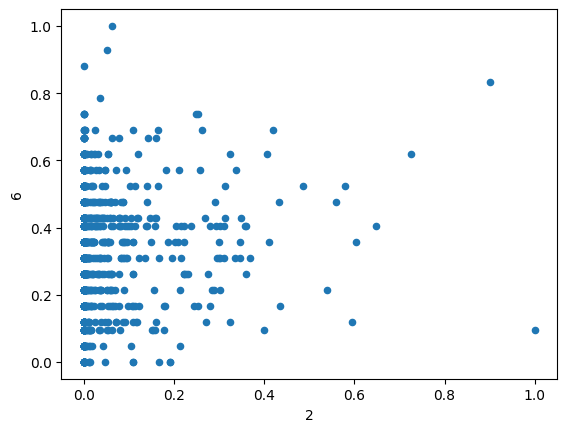

In [ ]:
pd.DataFrame(X_train_norm).plot.scatter(x=2, y=6) # Rainfall vs pressure3pm

<Axes: >

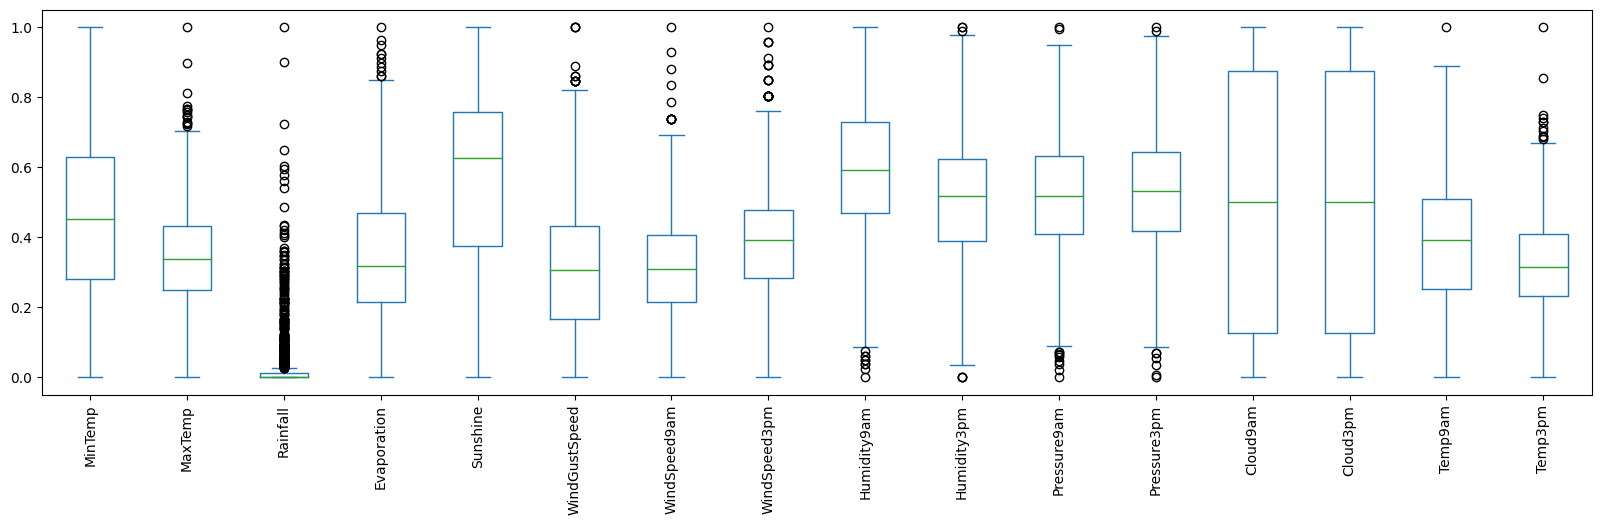

In [ ]:
pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

* **Rangos**: Todos los datos numericos están contenidos entre 0 y 1 (as intended), i.e., Min = 0, Max = 1
* **Mediana**: es diferente en todos los casos.

¿Qué notas en la variable **Rainfall**?

¿Podemos tener algun efecto negativo por parte de los *outliers*?

### Standarization
- [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) Estandariza las características eliminando la media y escalando a la varianza de la unidad.

In [ ]:
# Importamos StandScal
from sklearn.preprocessing import StandardScaler

stand_scal = StandardScaler().fit(X) # ajusta parametros del imputador
array_ss = stand_scal.transform(X) # Numpy array con escalamiento segun SS

data_ss = pd.DataFrame(array_ss, columns = X.columns) # creo DF con datos escalados
data_ss.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
MinTemp,3334.0,0.0,1.0,-2.320,-0.849,0.008,0.842,2.797
MaxTemp,3335.0,-0.0,1.0,-2.515,-0.757,-0.045,0.667,5.073
Rainfall,3331.0,-0.0,1.0,-0.337,-0.337,-0.337,-0.195,11.732
Evaporation,3286.0,-0.0,1.0,-1.868,-0.716,-0.140,0.653,4.758
Sunshine,3321.0,0.0,1.0,-1.884,-0.756,0.294,0.793,1.685
WindGustSpeed,2301.0,-0.0,1.0,-1.904,-0.828,-0.059,0.634,4.171
WindSpeed9am,3311.0,0.0,1.0,-2.129,-0.858,-0.010,0.696,5.500
WindSpeed3pm,3312.0,0.0,1.0,-2.584,-0.579,-0.045,0.623,5.034
Humidity9am,3323.0,-0.0,1.0,-3.264,-0.678,0.051,0.780,2.106
Humidity3pm,3324.0,0.0,1.0,-2.744,-0.657,0.080,0.632,2.719


<Axes: >

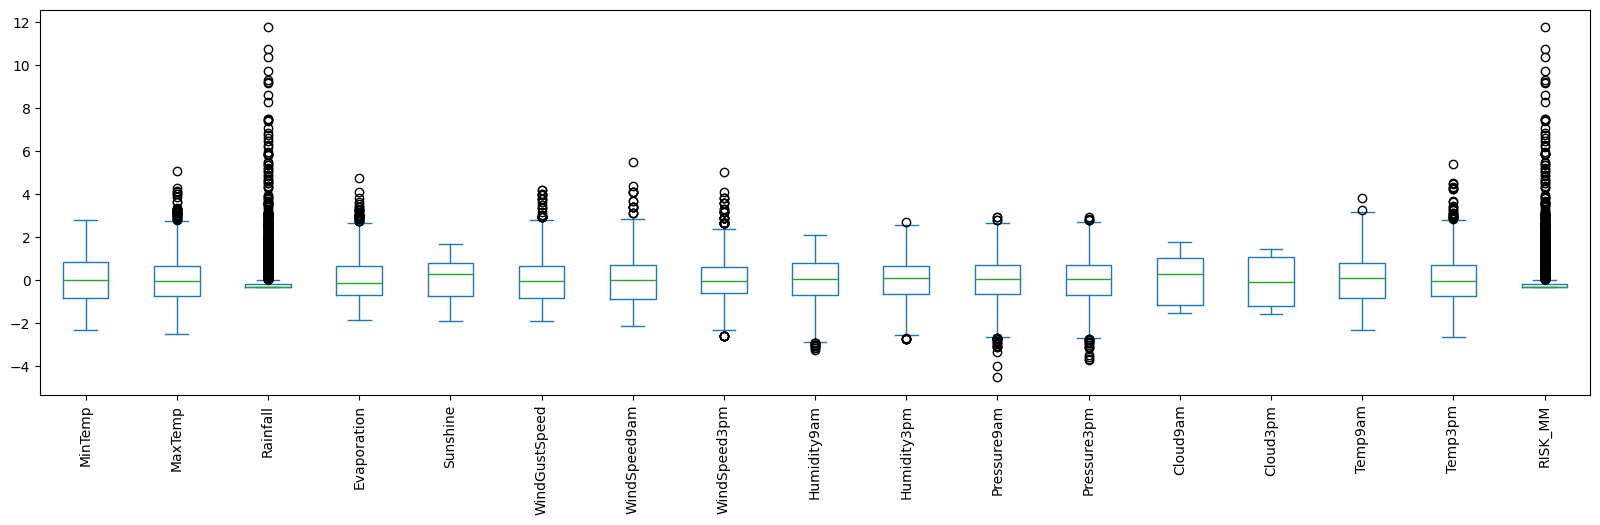

In [ ]:
# Datos escalados segun Standard Scaler
data_ss.plot.box(figsize=(20,5), rot=90)

In [ ]:
scale = StandardScaler().fit(X_train) # obtiene parámetros mean & std dev

X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

In [ ]:
pd.DataFrame(X_train_stand).describe()#.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03,1.352000e+03
mean,-1.839423e-17,2.732857e-16,4.861332e-17,2.890521e-17,-8.934339e-17,-3.941620e-17,1.129931e-16,1.859131e-16,4.151840e-16,8.934339e-17,-2.880339e-15,1.732868e-14,-8.146015e-17,-1.865700e-16,-3.271545e-16,4.178117e-16
std,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00,1.000370e+00
min,-2.192695e+00,-2.634602e+00,-3.488913e-01,-1.907681e+00,-2.032685e+00,-1.811787e+00,-1.967250e+00,-2.452027e+00,-3.132514e+00,-2.697810e+00,-3.096255e+00,-3.141603e+00,-1.525778e+00,-1.581177e+00,-2.300968e+00,-2.579025e+00
25%,-8.305542e-01,-7.254268e-01,-3.488913e-01,-7.097808e-01,-6.525960e-01,-8.530644e-01,-6.032123e-01,-6.572980e-01,-6.252925e-01,-6.218986e-01,-6.467168e-01,-6.578735e-01,-1.158265e+00,-1.194883e+00,-7.857181e-01,-7.299585e-01
50%,4.306253e-03,-5.160023e-02,-3.488913e-01,-1.460631e-01,2.674633e-01,-5.412905e-02,3.026711e-03,3.298233e-02,3.450260e-02,7.007177e-02,9.093029e-03,2.337813e-02,-5.572503e-02,-3.600078e-02,6.282158e-02,-6.619090e-02
75%,8.611368e-01,6.671482e-01,-2.265495e-01,6.995134e-01,7.545535e-01,6.649128e-01,6.092657e-01,5.852066e-01,7.602772e-01,6.362293e-01,6.897173e-01,6.904370e-01,1.046815e+00,1.122882e+00,7.699380e-01,6.924006e-01
max,2.662678e+00,5.024560e+00,1.120018e+01,3.659031e+00,1.647552e+00,3.940548e+00,4.398260e+00,3.898552e+00,2.211826e+00,2.649234e+00,2.901746e+00,2.819348e+00,1.414328e+00,1.509176e+00,3.719624e+00,5.409891e+00


* ¿Qué pasó con la **desviación estandard**?
* ¿Qué pasó con la **media**?
* ¿Qué pasó con los **mínimos** y **máximos**?

<Axes: xlabel='2', ylabel='6'>

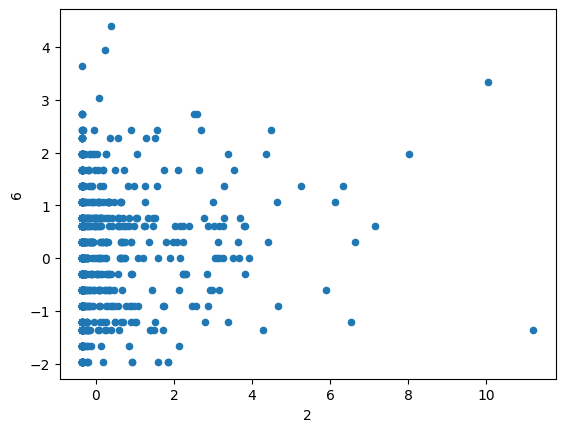

In [ ]:
pd.DataFrame(X_train_stand).plot.scatter(x=2, y=6)

<Axes: >

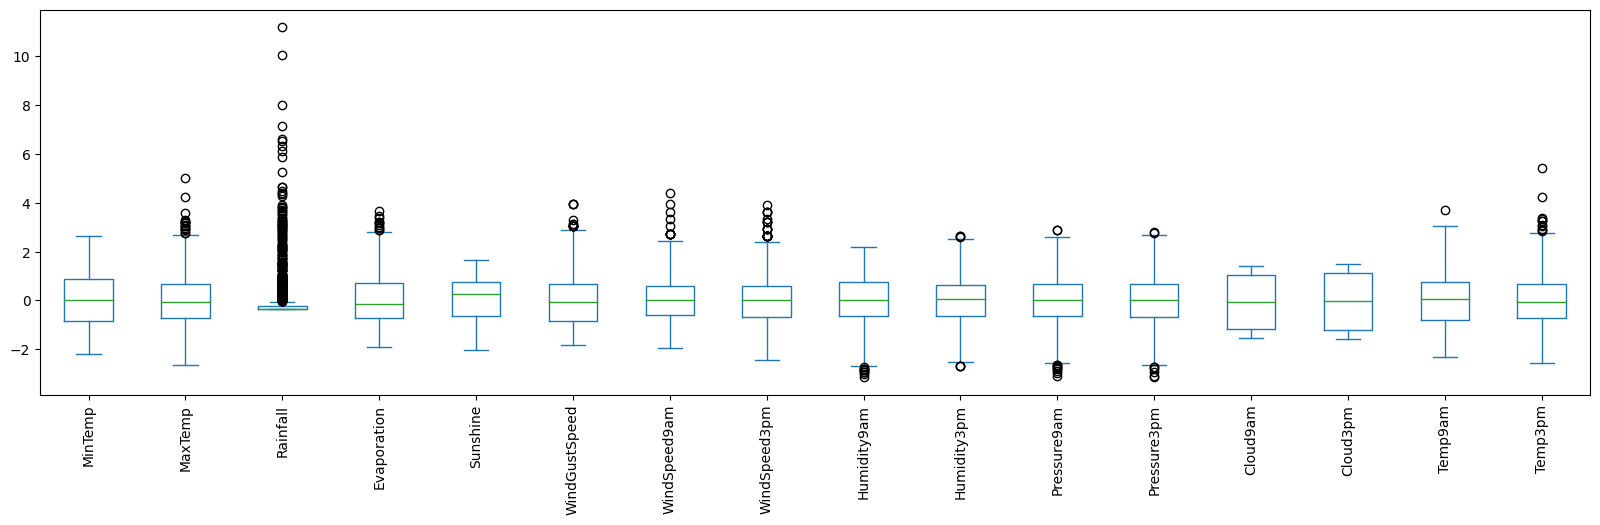

In [ ]:
pd.DataFrame(X_train_stand, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

### Robust scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(X_train)
X_train_rs = rs.transform(X_train)
pd.DataFrame(X_train_rs).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000
mean,-0.002546,0.037054,2.851775,0.103643,-0.190075,0.035659,-0.002496,-0.026545,-0.024901,-0.055695,-0.006804,-0.017339,0.025271,0.015533,-0.040383,0.046536
std,0.591343,0.718360,8.176845,0.709838,0.710920,0.659015,0.825062,0.805124,0.721992,0.795126,0.748537,0.741943,0.453666,0.431610,0.643053,0.703318
min,-1.298701,-1.854839,0.000000,-1.250000,-1.634615,-1.157895,-1.625000,-2.000000,-2.285714,-2.200000,-2.323607,-2.347368,-0.666667,-0.666667,-1.519481,-1.766667
25%,-0.493506,-0.483871,0.000000,-0.400000,-0.653846,-0.526316,-0.500000,-0.555556,-0.476190,-0.550000,-0.490716,-0.505263,-0.500000,-0.500000,-0.545455,-0.466667
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.506494,0.516129,1.000000,0.600000,0.346154,0.473684,0.500000,0.444444,0.523810,0.450000,0.509284,0.494737,0.500000,0.500000,0.454545,0.533333
max,1.571429,3.645161,94.400000,2.700000,0.980769,2.631579,3.625000,3.111111,1.571429,2.050000,2.164456,2.073684,0.666667,0.666667,2.350649,3.850000


In [ ]:
# Importamos RobustScaler
from sklearn.preprocessing import RobustScaler

rob_scal = RobustScaler().fit(X) # ajusta parametros del imputador
array_rs = rob_scal.transform(X) # Numpy array con escalamiento segun RS

data_rs = pd.DataFrame(array_rs, columns = X.columns) # creo DF con datos escalados
data_rs.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
MinTemp,3334.0,-0.005,0.591,-1.377,-0.506,0.0,0.494,1.649
MaxTemp,3335.0,0.032,0.702,-1.734,-0.500,0.0,0.500,3.594
Rainfall,3331.0,2.379,7.068,0.000,0.000,0.0,1.000,85.286
Evaporation,3286.0,0.102,0.731,-1.263,-0.421,0.0,0.579,3.579
Sunshine,3321.0,-0.190,0.646,-1.407,-0.678,0.0,0.322,0.898
WindGustSpeed,2301.0,0.040,0.685,-1.263,-0.526,0.0,0.474,2.895
WindSpeed9am,3311.0,0.006,0.644,-1.364,-0.545,0.0,0.455,3.545
WindSpeed3pm,3312.0,0.037,0.831,-2.111,-0.444,0.0,0.556,4.222
Humidity9am,3323.0,-0.035,0.686,-2.273,-0.500,0.0,0.500,1.409
Humidity3pm,3324.0,-0.062,0.776,-2.190,-0.571,0.0,0.429,2.048


<Axes: >

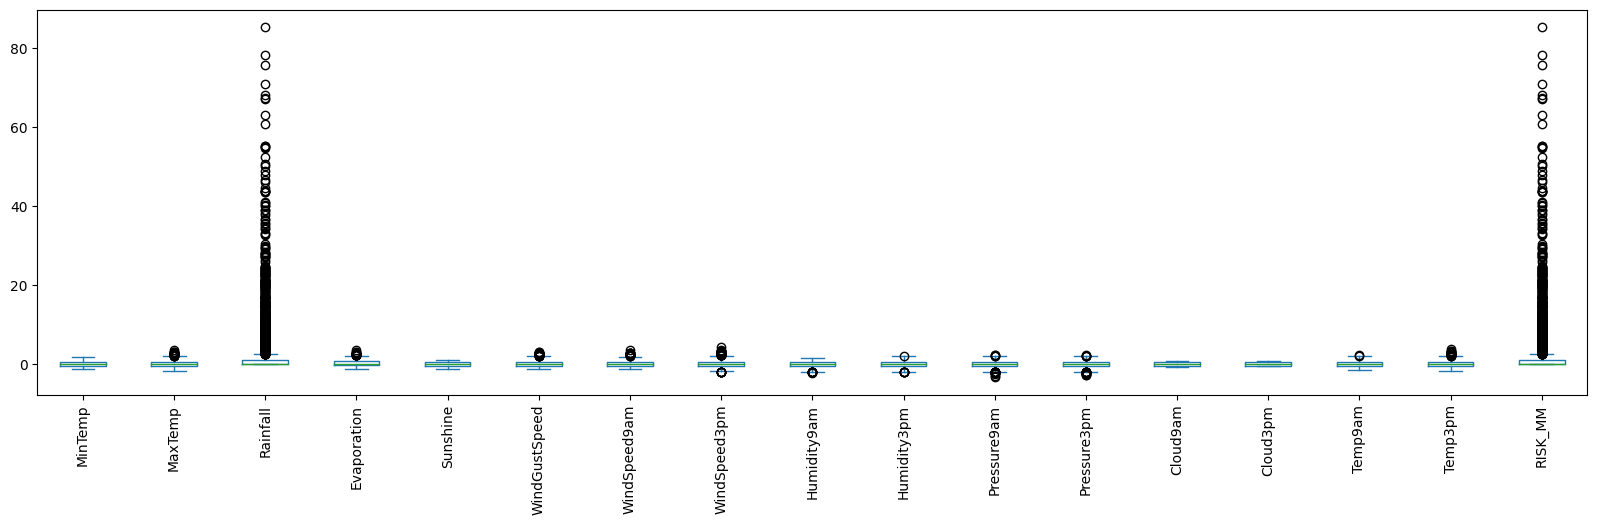

In [ ]:
# Datos escalados segun Robust Scaler
data_rs.plot.box(figsize=(20,5), rot=90)

<Axes: xlabel='2', ylabel='6'>

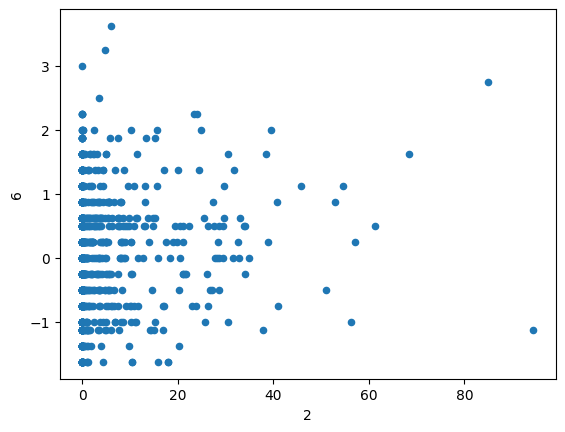

In [ ]:
pd.DataFrame(X_train_rs).plot.scatter(x=2, y=6)

<Axes: >

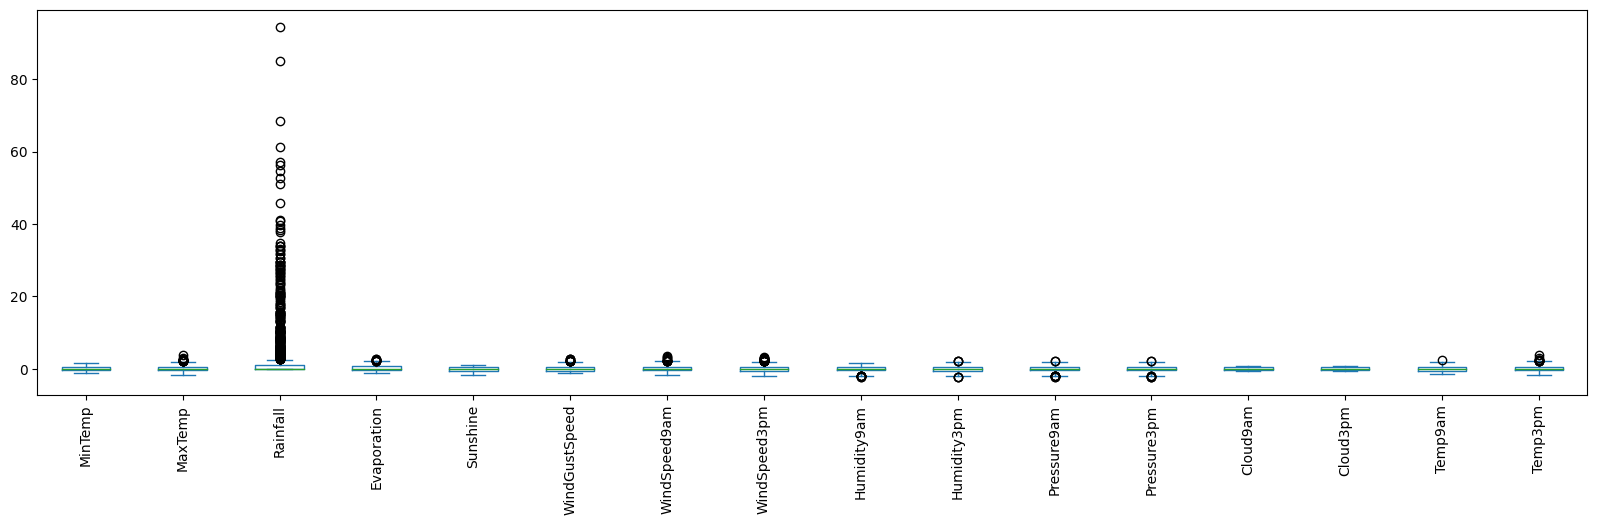

In [ ]:
pd.DataFrame(X_train_rs, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

### Impacto en un modelo simple de *Machine Learning*
- Utilizaremos un modelo de ML: *SVC*
- [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)

In [ ]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score

score = []

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

for train, test in zip(trainX, testX):
    svc = SVC()

    svc.fit(train, y_train) # ajustar sus parametros a los datos de entrenaimento dados
    y_pred = svc.predict(test) # realizar predicciones y almacenarlas en y_pred

    score.append(round(accuracy_score(y_test, y_pred)*100, 3))

df_svr = pd.DataFrame({'Accuracy score %': score}, index=['Original', 'Normalized', 'Standardized'])
df_svr

,Accuracy score %
Original,71.893
Normalized,80.769
Standardized,81.361


### Otro modelo de ML
Probemos con KNN:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

score = []

for train, test in zip(trainX, testX):
    knn = KNN()

    knn.fit(train, y_train)
    y_pred = knn.predict(test)

    score.append(round(accuracy_score(y_test, y_pred)*100, 3))

df_knn = pd.DataFrame({'Accuracy score %': score}, index=['Original', 'Normalized', 'Standardized'])
df_knn

,Accuracy score %
Original,80.769
Normalized,79.586
Standardized,78.994
